In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from models.neutrinos.supernova_neutrino import SupernovaNeutrino
from detectors.sabre_veto import SABREVeto
from constants import *

from scipy import stats

import multihist as mh
import pickle as pkl

In [2]:
Det = SABREVeto()
Model = SupernovaNeutrino()

In [3]:
energy_edges = np.linspace(0., 50., 1001)
energy_centers = 0.5 * (energy_edges[1:] + energy_edges[:-1])

energy_centers_eV = energy_centers * MeV

In [4]:
rate_centers_IBD = np.array([Det.dRdE_True(e, Model.dRdER, 
                                           channel='IBD', source='supernova_e', per_proton=True,
                                           E_ave=12*MeV) for e in energy_centers_eV])

In [5]:
rate_centers_pES_e = np.array([Det.dRdE_True(e, Model.dRdER, 
                                             channel='pES', source='supernova_e', per_proton=True,
                                             E_ave=12*MeV, NR=True) for e in energy_centers_eV])
rate_centers_pES_ea = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='pES', source='supernova_ea', per_proton=True,
                                              E_ave=14*MeV, NR=True) for e in energy_centers_eV])
rate_centers_pES_mu = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='pES', source='supernova_mu', per_proton=True,
                                              E_ave=16*MeV, NR=True) for e in energy_centers_eV])

rate_centers_pES = rate_centers_pES_e + rate_centers_pES_ea + 4. * rate_centers_pES_mu

In [6]:
rate_centers_pES_e = np.array([Det.dRdE_True(e, Model.dRdER, 
                                             channel='pES', source='supernova_e', per_proton=True,
                                             E_ave=12*MeV, NR=True) for e in energy_centers_eV])
rate_centers_pES_ea = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='pES', source='supernova_ea', per_proton=True,
                                              E_ave=14*MeV, NR=True) for e in energy_centers_eV])
rate_centers_pES_mu = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='pES', source='supernova_mu', per_proton=True,
                                              E_ave=16*MeV, NR=True) for e in energy_centers_eV])

rate_centers_pES = rate_centers_pES_e + rate_centers_pES_ea + 4. * rate_centers_pES_mu

In [7]:
rate_centers_eES_e = np.array([Det.dRdE_True(e, Model.dRdER, 
                                             channel='eES', source='supernova_e', per_electron=True,
                                             E_ave=12*MeV) for e in energy_centers_eV])
rate_centers_eES_ea = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='eES', source='supernova_ea', per_electron=True,
                                              E_ave=14*MeV) for e in energy_centers_eV])
rate_centers_eES_mu = np.array([Det.dRdE_True(e, Model.dRdER, 
                                              channel='eES', source='supernova_mu', per_electron=True,
                                              E_ave=16*MeV) for e in energy_centers_eV])
rate_centers_eES_mua = np.array([Det.dRdE_True(e, Model.dRdER, 
                                               channel='eES', source='supernova_mua', per_electron=True,
                                               E_ave=16*MeV) for e in energy_centers_eV])

rate_centers_eES = rate_centers_eES_e + rate_centers_eES_ea + 2. * rate_centers_eES_mu + 2. * rate_centers_eES_mua

In [8]:
rate_C12_e = Det.dRdE_True(None, Model.dRdER, 
                           channel='C12_NC', source='supernova_e', per_carbon=True,
                           E_ave=12*MeV)
rate_C12_ea = Det.dRdE_True(None, Model.dRdER, 
                            channel='C12_NC', source='supernova_ea', per_carbon=True,
                            E_ave=14*MeV)
rate_C12_mu = Det.dRdE_True(None, Model.dRdER, 
                            channel='C12_NC', source='supernova_mu', per_carbon=True,
                            E_ave=16*MeV)

rate_C12 = rate_C12_e + rate_C12_ea + 4. * rate_C12_mu

rate_centers_C12 = rate_C12 * Det.Res(energy_centers, w_value_C12_M1 / MeV)

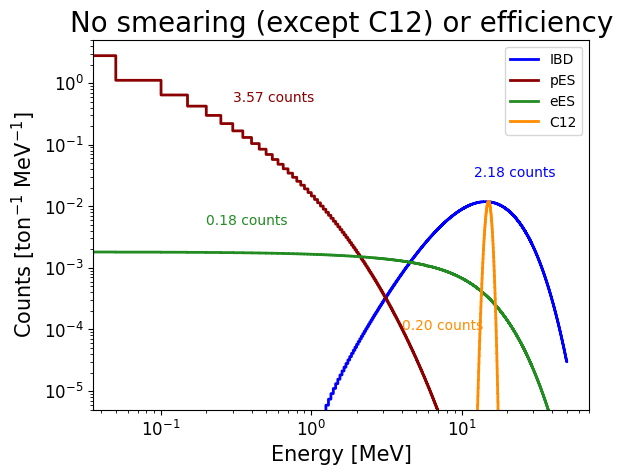

In [9]:
hist_IBD = mh.Histdd.from_histogram(histogram=rate_centers_IBD, bin_edges=[energy_edges])
hist_IBD.plot(color='blue', linewidth=2)
plt.text(12., 0.03, f'{(hist_IBD * hist_IBD.bin_volumes()).n * 11.02:.2f} counts', color='blue')

hist_pES = mh.Histdd.from_histogram(histogram=rate_centers_pES, bin_edges=[energy_edges])
hist_pES.plot(color='darkred', linewidth=2)
plt.text(0.3, 0.5, f'{(hist_pES * hist_pES.bin_volumes()).n * 11.02:.2f} counts', color='darkred')

hist_eES = mh.Histdd.from_histogram(histogram=rate_centers_eES, bin_edges=[energy_edges])
hist_eES.plot(color='forestgreen', linewidth=2)
plt.text(0.2, 0.005, f'{(hist_eES * hist_eES.bin_volumes()).n * 11.02:.2f} counts', color='forestgreen')

hist_smeared_C12 = mh.Histdd.from_histogram(histogram=rate_centers_C12, bin_edges=[energy_edges])
hist_smeared_C12.plot(color='darkorange', linewidth=2)
plt.text(4., 1e-4, f'{(hist_smeared_C12 * hist_smeared_C12.bin_volumes()).n * 11.02:.2f} counts', color='darkorange')

plt.legend(['IBD', 'pES', 'eES', 'C12'])

plt.yscale('log')
plt.xscale('log')
plt.ylim(5e-6, 5)

plt.title(r'No smearing (except C12) or efficiency', fontsize=20)
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [ton$^{-1}$ MeV$^{-1}$]')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [10]:
def smear_hist(hist_unsmeared):
    sample = hist_unsmeared.get_random(int(1e7))[:, 0]
    sample_smear = stats.norm.rvs(loc=sample, scale=(Det.DeltaE(sample)))
    
    hist_smeared = np.histogram(sample_smear, bins=energy_edges)[0]
    hist_smeared = mh.Histdd.from_histogram(histogram=hist_smeared, bin_edges=[energy_edges])

    normalisation_unsmeared = (hist_unsmeared * hist_unsmeared.bin_volumes()).n
    fractional_loss = hist_smeared.n / len(sample_smear)

    hist_smeared.histogram = hist_smeared.histogram / (hist_smeared * hist_smeared.bin_volumes()).n * normalisation_unsmeared * fractional_loss
    
    return hist_smeared

In [11]:
def apply_effs(hist, coincidence='2fold'):
    energy_edges = hist.bin_edges[0]
    energy_centers = 0.5 * (energy_edges[1:] + energy_edges[:-1])
    
    effs = Det.Eff(energy_centers, coincidence=coincidence)
    
    hist.histogram = hist.histogram * effs
    
    return hist

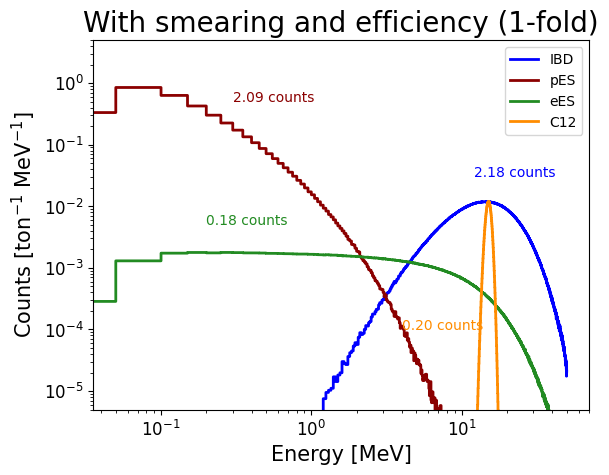

In [12]:
hist_smeared_IBD = smear_hist(hist_IBD)
hist_smeared_effs_IBD = apply_effs(hist_smeared_IBD, coincidence='1fold')
hist_smeared_effs_IBD.plot(color='blue', linewidth=2)
plt.text(12., 0.03, f'{(hist_smeared_effs_IBD * hist_smeared_effs_IBD.bin_volumes()).n * 11.02:.2f} counts', color='blue')

hist_smeared_pES = smear_hist(hist_pES)
hist_smeared_effs_pES = apply_effs(hist_smeared_pES, coincidence='1fold')
hist_smeared_effs_pES.plot(color='darkred', linewidth=2)
plt.text(0.3, 0.5, f'{(hist_smeared_effs_pES * hist_smeared_effs_pES.bin_volumes()).n * 11.02:.2f} counts', color='darkred')

hist_smeared_eES = smear_hist(hist_eES)
hist_smeared_effs_eES = apply_effs(hist_smeared_eES, coincidence='1fold')
hist_smeared_effs_eES.plot(color='forestgreen', linewidth=2)
plt.text(0.2, 0.005, f'{(hist_smeared_effs_eES * hist_smeared_effs_eES.bin_volumes()).n * 11.02:.2f} counts', color='forestgreen')

hist_smeared_effs_C12 = apply_effs(hist_smeared_C12, coincidence='1fold')
hist_smeared_effs_C12.plot(color='darkorange', linewidth=2)
plt.text(4., 1e-4, f'{(hist_smeared_effs_C12 * hist_smeared_effs_C12.bin_volumes()).n * 11.02:.2f} counts', color='darkorange')

plt.legend(['IBD', 'pES', 'eES', 'C12'])

plt.yscale('log')
plt.xscale('log')
plt.ylim(5e-6, 5)

plt.title(r'With smearing and efficiency (1-fold)', fontsize=20)
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [ton$^{-1}$ MeV$^{-1}$]')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

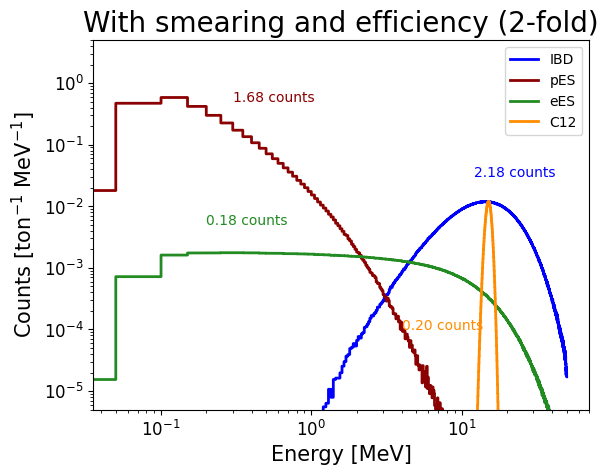

In [13]:
hist_smeared_IBD = smear_hist(hist_IBD)
hist_smeared_effs_IBD = apply_effs(hist_smeared_IBD, coincidence='2fold')
hist_smeared_effs_IBD.plot(color='blue', linewidth=2)
plt.text(12., 0.03, f'{(hist_smeared_effs_IBD * hist_smeared_effs_IBD.bin_volumes()).n * 11.02:.2f} counts', color='blue')

hist_smeared_pES = smear_hist(hist_pES)
hist_smeared_effs_pES = apply_effs(hist_smeared_pES, coincidence='2fold')
hist_smeared_effs_pES.plot(color='darkred', linewidth=2)
plt.text(0.3, 0.5, f'{(hist_smeared_effs_pES * hist_smeared_effs_pES.bin_volumes()).n * 11.02:.2f} counts', color='darkred')

hist_smeared_eES = smear_hist(hist_eES)
hist_smeared_effs_eES = apply_effs(hist_smeared_eES, coincidence='2fold')
hist_smeared_effs_eES.plot(color='forestgreen', linewidth=2)
plt.text(0.2, 0.005, f'{(hist_smeared_effs_eES * hist_smeared_effs_eES.bin_volumes()).n * 11.02:.2f} counts', color='forestgreen')

hist_smeared_effs_C12 = apply_effs(hist_smeared_C12, coincidence='2fold')
hist_smeared_effs_C12.plot(color='darkorange', linewidth=2)
plt.text(4., 1e-4, f'{(hist_smeared_effs_C12 * hist_smeared_effs_C12.bin_volumes()).n * 11.02:.2f} counts', color='darkorange')

plt.legend(['IBD', 'pES', 'eES', 'C12'])

plt.yscale('log')
plt.xscale('log')
plt.ylim(5e-6, 5)

plt.title(r'With smearing and efficiency (2-fold)', fontsize=20)
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [ton$^{-1}$ MeV$^{-1}$]')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)